#### 11.1 Simple Thresholding, Otsu's Binarization, and Adaptive Thresholding

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import skimage.data as data

(-0.5, 511.5, 511.5, -0.5)

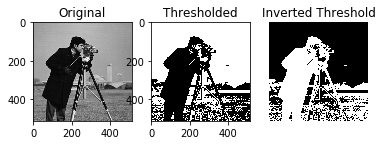

In [10]:
img = data.camera() 
 
thresh = 127 
 
output1 = img > thresh 
output2 = img <= thresh 
 
output = [img, output1, output2] 
titles = ['Original', 'Thresholded', 'Inverted Threshold'] 
 
for i in range(3): 
    plt.subplot(1, 3, i+1) 
    plt.imshow(output[i], cmap='gray') 
    plt.title(titles[i]) 
plt.axis('off')

#### Otsu's Binarization.
In this algorithm, the threshold of an image is automatically computed. 
This is the best way to threshold images with bimodal histogram. 
Bimodal histogram is a histogram with two peaks. In such im- ages, 
there are usually foreground and background areas. After thresholding, 
we can easily label foreground and background areas.

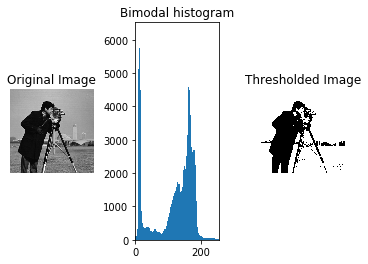

In [5]:
from skimage.filters import threshold_otsu 
thresh = threshold_otsu(img) 
binary = img > thresh
plt.subplots_adjust(wspace=0.5, hspace=0.5) 
plt.subplot(1, 3, 1) 
plt.title ('Original Image') 
plt.imshow(img, cmap='gray') 
plt.axis('off') 
plt.subplot(1, 3, 2) 
plt.title('Bimodal histogram') 
plt.hist(img.ravel(), bins=256, range=[0, 255]) 
plt.xlim([0, 255]) 
plt.subplot(1, 3, 3) 
plt.title('Thresholded Image') 
plt.imshow(binary, cmap='gray') 
plt.axis('off') 
plt.show()

In the earlier examples, the threshold was computed for entire image. In adaptive 
thresholding, threshold is computed region-wise. So, each region has different 
threshold

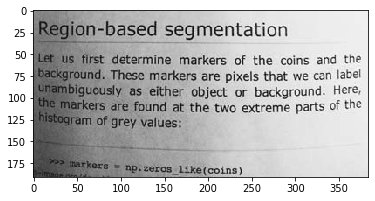

In [6]:
from skimage.filters import threshold_local 
img = data.page() 
adaptive = threshold_local(img, block_size = 3, offset = 30) 
plt.imshow(adaptive, cmap='gray') 
plt.show()

#### 11.2 Histogram Equalization

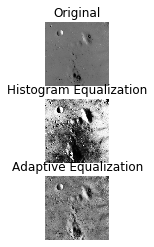

In [9]:
from skimage import data 
from skimage import exposure 
img = data.moon() 
img_eq = exposure.equalize_hist(img) 
img_adapthist = exposure.equalize_adapthist(img, clip_limit=0.03) 
output = [img, img_eq, img_adapthist] 
titles = ['Original', 'Histogram Equalization', 
'Adaptive Equalization']
for i in range(3): 
    plt.subplot(3, 1, i+1) 
    plt.imshow(output[i], cmap='gray') 
    plt.title(titles[i]) 
    plt.axis('off') 
plt.show()

#### 11.3 Image Transformations

<SimilarityTransform(matrix=
    [[   0.70710678,   -0.70710678,  256.        ],
     [   0.70710678,    0.70710678, -100.        ],
     [   0.        ,    0.        ,    1.        ]])>


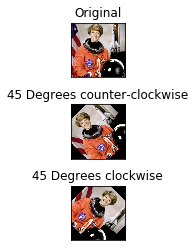

In [12]:
%matplotlib inline 
import math 
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import data 
from skimage import transform as tf 
img = data.astronaut()
# Similarity Transform 
tform = tf.SimilarityTransform(scale=1, rotation=math. pi/4, 
translation=(img.shape[0]/2, -100)) 
print(tform) 
output1 = tf.warp(img, tform) 
output2 = tf.warp(img, tform.inverse) 
output = [img, output1, output2] 
titles = ['Original', '45 Degrees counter-clockwise', '45 Degrees clockwise'] 
plt.subplots_adjust(wspace=0.5, hspace=0.5) 
for i in range(3): 
    plt.subplot(3, 1, i+1) 
    plt.imshow(output[i]) 
    plt.title(titles[i]) 
    plt.xticks([]), plt.yticks([])
plt.show()

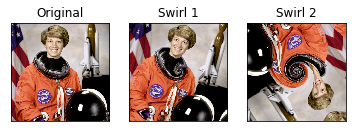

In [14]:
output1 = tf.swirl(img, rotation=50, strength=10, 
radius=120, mode='reflect') 
output2 = tf.swirl(img, rotation=10, strength=20, 
radius=200, mode='reflect') 
output = [img, output1, output2] 
titles = ['Original', 'Swirl 1', 'Swirl 2'] 
for i in range(3): 
    plt.subplot(1, 3, i+1) 
    plt.imshow(output[i], interpolation='nearest') 
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([]) 
plt.show()

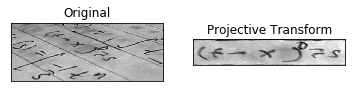

In [15]:
# Projective Transform 
img = data.text() 
src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]]) 
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]]) 
 
tform = tf.ProjectiveTransform() 
tform.estimate(src, dst) 
output1 = tf.warp(img, tform, output_shape=(50, 300)) 
output = [img, output1] 
titles = ['Original', 'Projective Transform'] 
for i in range(2): 
    plt.subplot(1, 2, i+1) 
    plt.imshow(output[i], cmap='gray') 
    plt.title(titles[i]) 
    plt.xticks([]), plt.yticks([])
plt.show()


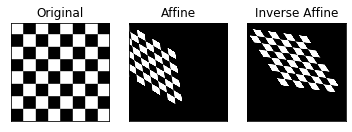

In [17]:
img = data.checkerboard() 
tform = tf.AffineTransform(scale=(1.2, 1.1), 
rotation=1, shear=0.7,
translation=(210, 50)) 
output1 = tf.warp(img, tform, output_shape=(350, 350)) 
output2 = tf.warp(img, tform.inverse, output_shape=(350, 350)) 
output = [img, output1, output2] 
titles = ['Original', 'Affine', 'Inverse Affine'] 
for i in range(3): 
    plt.subplot(1, 3, i+1) 
    plt.imshow(output[i], cmap='gray') 
    plt.xticks([]), plt.yticks([]) 
    plt.title(titles[i]) 
plt.show()                           

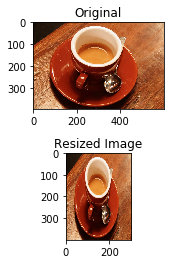

In [19]:
img = data.coffee() 
output1 = tf.resize(img, (img.shape[0], img.shape[1] * 1/2), mode='reflect') 
plt.subplots_adjust(wspace=0.5, hspace=0.5) 
output = [img, output1] 
titles = ['Original', 'Resized Image']
for i in range(2): 
    plt.subplot(2, 1, i+1) 
    plt.imshow(output[i]) 
    plt.title(titles[i]) 
plt.show()

#### 12 Kernels, Convolution and Filters

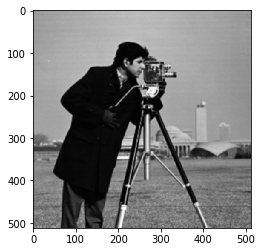

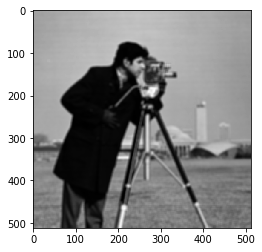

In [21]:
from scipy import signal 
import numpy as np
from skimage import data 
from matplotlib import pyplot as plt 
 
img = data.camera()
kernel = np.ones((3, 3),np.float32)/9 
dst2 = signal.convolve2d(img, kernel, boundary='symm', mode='same') 
plt.imshow(dst2, cmap='gray') 
plt.show()
#In the code above, the kernel is a unit 3x3 matrix divided by 9. This creates simple blur effect

# Simple Blur 
kernel = np.ones((7, 7),np.float32)/49 
dst2 = signal.convolve2d(img, kernel, boundary='symm', mode='same') 
plt.imshow(dst2, cmap='gray') 
plt.show()

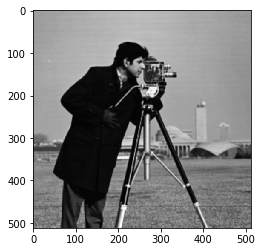

In [22]:
# Box blur 
kernel = np.array([[0.0625, 0.125, 0.0625], 
[0.125, 0.25, 0.125], 
[0.0625, 0.125, 0.0625]]) 
dst2 = signal.convolve2d(img, kernel, boundary='symm', mode='same') 
plt.imshow(dst2, cmap='gray') 
plt.show()

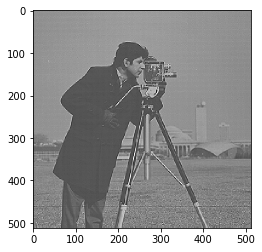

In [23]:
# Sharpen 
kernel = np.array([[0, -1, 0], 
[-1, 5, -1], 
[0, -1, 0]]) 
dst2 = signal.convolve2d(img, kernel, boundary='symm', mode='same') 
plt.imshow(dst2, cmap='gray')
plt.show()

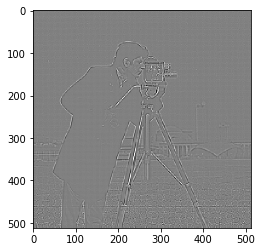

In [24]:
# Edge Detection 
kernel = np.array([[-1, -1, -1], 
[-1, 8, -1], 
[-1, -1,-1]]) 
dst2 = signal.convolve2d(img, kernel, boundary='symm', mode='same') 
plt.imshow(dst2, cmap='gray') 
plt.show()

#### 12.2 Built-in Image Filters in Scikit-image

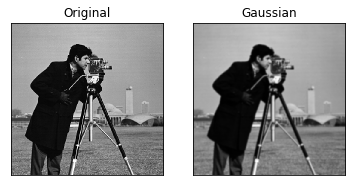

In [25]:
%matplotlib inline 
from skimage.data import camera 
from skimage.filters import gaussian 
from matplotlib import pyplot as plt 
img = camera() 
out1 = gaussian(img, sigma=2) 
 
output= [img, out1] 
 
titles = ['Original', 'Gaussian'] 
 
for i in range(2): 
    plt.subplot(1, 2, i+1)
    plt.title(titles[i]) 
    plt.imshow(output[i], cmap='gray') 
    plt.xticks([]), plt.yticks([]) 
plt.show()

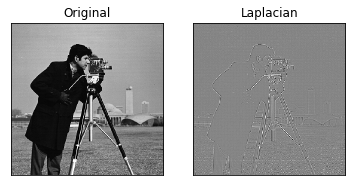

In [26]:
from skimage.filters import laplace 
out1 = laplace(img, ksize=3) 
output = [img, out1] 
titles = ['Original', 'Laplacian'] 
for i in range(2): 
    plt.subplot(1, 2, i+1) 
    plt.title(titles[i]) 
    plt.imshow(output[i], cmap='gray') 
    plt.xticks([]), plt.yticks([]) 
plt.show()

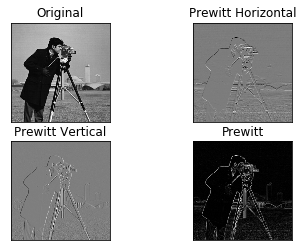

In [27]:
from skimage.filters import prewitt_h, prewitt_v, prewitt 
 
out1 = prewitt_h(img) 
out2 = prewitt_v(img) 
out3 = prewitt(img) 
 
output = [img, out1, out2, out3] 
titles = ['Original', 'Prewitt Horizontal', 'Prewitt Vertical', 'Prewitt'] 
 
for i in range(4): 
    plt.subplot(2, 2, i+1) 
    plt.title(titles[i]) 
    plt.imshow(output[i], cmap='gray') 
    plt.xticks([]), plt.yticks([]) 
plt.show()

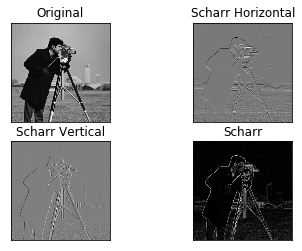

In [30]:
from skimage.filters import scharr_h, scharr_v, scharr
out1 = scharr_h(img) 
out2 = scharr_v(img) 
out3 = scharr(img) 
output = [img, out1, out2, out3] 
titles = ['Original', 'Scharr Horizontal', 'Scharr Vertical', 'Scharr'] 
 
for i in range(4): 
    plt.subplot(2, 2, i+1) 
    plt.title(titles[i]) 
    plt.imshow(output[i], cmap='gray') 
    plt.xticks([]), plt.yticks([]) 
plt.show()

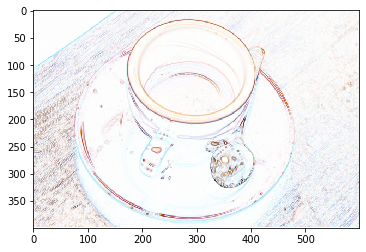

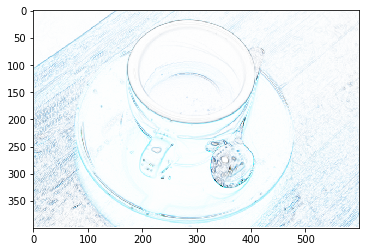

In [39]:
%matplotlib inline 
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value 
from skimage import filters 
from skimage import data 
from skimage.exposure import rescale_intensity 
import matplotlib.pyplot as plt 
@adapt_rgb(each_channel) 
def scharr_each(image): 
    return filters.scharr(image) 
 
@adapt_rgb(hsv_value) 
def scharr_hsv(image): 
    return filters.scharr(image) 
 
image = data.coffee() 
out1 = rescale_intensity(i - scharr_each(image)) 
out2 = rescale_intensity(i - scharr_hsv(image))

plt.imshow(out1) 
plt.show()

plt.imshow(out2)
plt.show()

#### 13 Morphological Operations and Image Restoration
13.1 Mathematical Morphology and Morphological Operations

In [40]:
%matplotlib inline 
from skimage import morphology 
import numpy as np 
print(morphology.square(4, np.uint8)) 
print('\n')

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]




In [42]:
print(morphology.rectangle(6, 2, np.float16)) 
print('\n') 
print(morphology.diamond(4, np.float16)) 
print('\n') 
print(morphology.disk(4, np.float16)) 
print('\n') 
print(morphology.cube(4, np.float16)) 
print('\n') 
print(morphology.octahedron(4, np.float16))
print('\n') 
print(morphology.ball(3, np.float16)) 
print('\n') 
print(morphology.octagon(3, 4, np.float16)) 
print('\n') 
print(morphology.star(4, np.float16)) 
print('\n')

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


[[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


[[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0

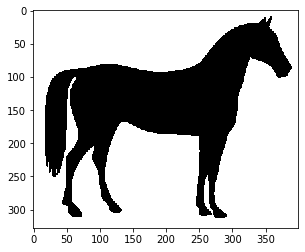

In [43]:
from skimage import data 
import matplotlib.pyplot as plt 
image = out1 = out2 = out3 = out4 = data.horse()
plt.imshow(image, cmap='gray') 
plt.show()

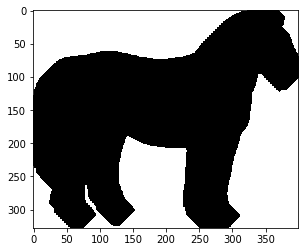

In [46]:
for i in range(20): 
    out1 = morphology.binary_erosion(out1) 
    out2 = morphology.binary_dilation(out2) 
    out3 = morphology.binary_opening(out3) 
    out4 = morphology.binary_closing

plt.imshow(out1,cmap='gray') 
plt.show()

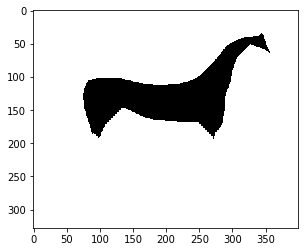

In [47]:
plt.imshow(out2, cmap='gray') 
plt.show()

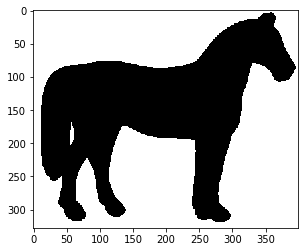

In [48]:
selem = morphology.star(4, np.float16) 
output = morphology.binary_erosion(data.horse(),selem) 
plt.imshow(output, cmap='gray') 
plt.show()

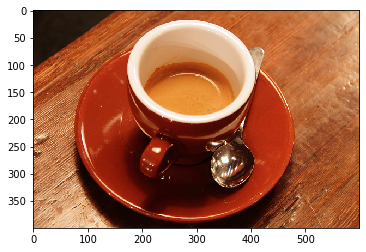

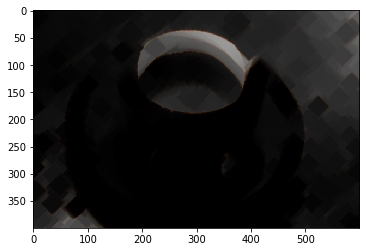

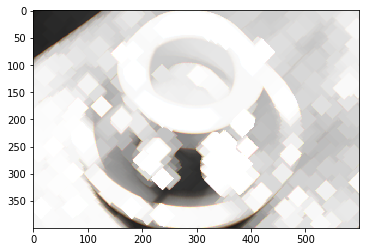

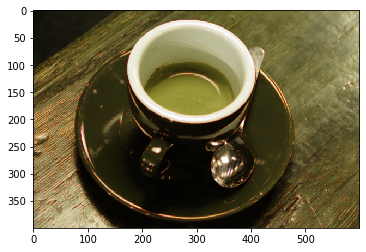

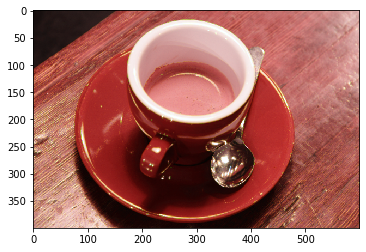

In [55]:
image = out1 = out2 = out3 = out4 = data.camera() 
for i in range(20): 
    out1 = morphology.erosion(out1) 
    out2 = morphology.dilation(out2) 
    out3 = morphology.opening(out3) 
    out4 = morphology.closing(out4)
    image = out1 = out2 = out3 = out4 = data.coffee() 

plt.imshow(image, cmap='gray') 
plt.show()

for i in range(20): 
    out1 = morphology.erosion(out1) 
    out2 = morphology.dilation(out2) 
    out3 = morphology.opening(out3) 
    out4 = morphology.closing(out4)    
plt.imshow(out1, cmap='gray')
plt.show()
plt.imshow(out2, cmap='gray')
plt.show()
plt.imshow(out3, cmap='gray')
plt.show()
plt.imshow(out4, cmap='gray')
plt.show()  
    

#### 13.2 Image Restoration by Inpainting

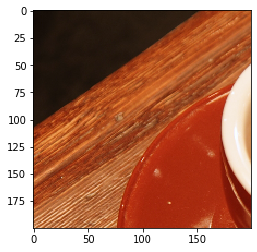

In [56]:
from skimage import data 
from skimage.restoration import inpaint 
image = data.coffee()[0:200, 0:200] 
plt.imshow(image) 
plt.show()

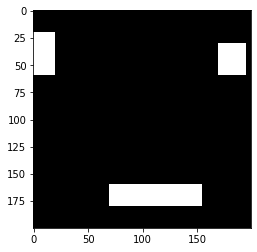

In [57]:
# Create mask with three defect regions: left, middle, right respectively

mask = np.zeros(image.shape[:-1]) 
mask[20:60, 0:20] = 1 
mask[160:180, 70:155] = 1 
mask[30:60, 170:195] = 1 
plt.imshow(mask, cmap='gray') 
plt.show()

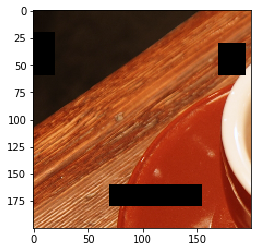

In [59]:
defect =image.copy() 
for layer in range(defect.shape[-1]): 
    defect[np.where(mask)] = 0 
    plt.imshow(defect) 
plt.show()

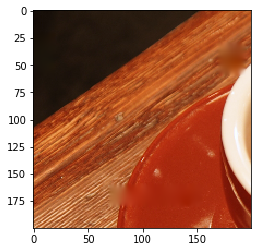

In [61]:
result = inpaint.inpaint_biharmonic(defect, mask, multichannel=True) 
plt.imshow(result) 
plt.show()

#### 14 Noise Removal and Edge Detection
14.1 Noise

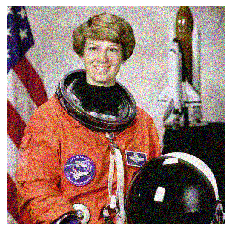

In [63]:
import random
from skimage import data, img_as_float 
from skimage.util import random_noise 
original = img_as_float(data.astronaut()) 
sigma = 0.155 
noisy = random_noise(original, var=sigma**2) 
plt.imshow(noisy) 
plt.axis('off') 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


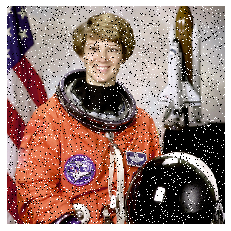

In [71]:
s_a_p_noisy = np.zeros(original.shape, np.float64)
p = 0.1 
for i in range(original.shape[0]): 
    for j in range(original.shape[1]): 
        r = random.random() 
        if r < p/2: 
            s_a_p_noisy[i][j] = 0.0, 0.0, 0.0 
        elif r < p: 
            s_a_p_noisy[i][j] = 255.0, 255.0, 255.0 
        else: 
            s_a_p_noisy[i][j] = original[i][j] 
    
plt.imshow(s_a_p_noisy) 
plt.axis('off')
plt.show()

#### 14.2 Noise Removal

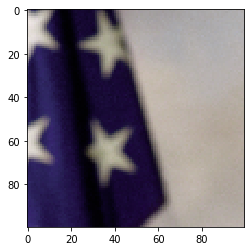

In [76]:
from skimage.restoration import(denoise_tv_chambolle, denoise_bilateral, denoise_nl_means, denoise_tv_bregman) 
from skimage import data, img_as_float 
from skimage.util import random_noise 
original = img_as_float(data.astronaut()[0:100, 0:100]) 
plt.imshow(original) 
plt.show()

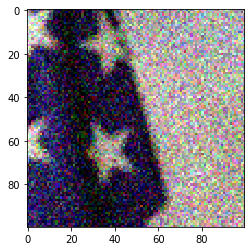

In [77]:
sigma=0.155
noisy = random_noise(original, var=sigma**2) 
plt.imshow(noisy) 
plt.show()

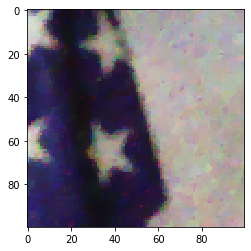

In [78]:
output1 = denoise_tv_chambolle(noisy, weight=0.1, 
multichannel=True) 
plt.imshow(output1) 
plt.show()

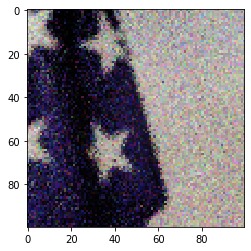

In [79]:
#Bilateral denoising function too cleans the noise considerably: 
output2 = denoise_bilateral(noisy, sigma_color=0.05, 
sigma_spatial=15, multichannel=True) 
plt.imshow(output2) 
plt.show()

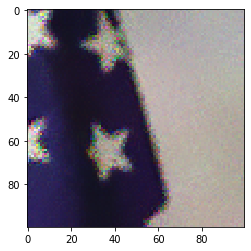

In [80]:
# NL means denoising, as follows: 
output3 = denoise_nl_means(noisy, multichannel=True) 
plt.imshow(output3) 
plt.show()

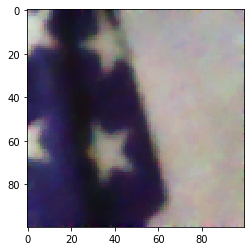

In [81]:
# Another denoising function, as follows: 
output4 = denoise_tv_bregman(noisy, weight=2) 
plt.imshow(output4) 
plt.show()

14.3 Canny Edge Detector

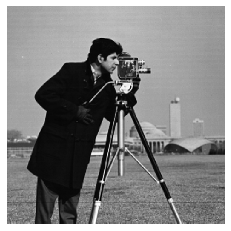

In [82]:
from skimage import feature, data
original = data.camera() 
plt.imshow(original, cmap='gray') 
plt.axis('off') 
plt.show()

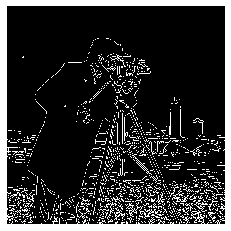

In [83]:
edges1 = feature.canny(original) 
# by default sigma = 1 
plt.imshow(edges1, cmap='gray') 
plt.axis('off') 
plt.show()

#### 15 Advanced Image Processing Operations
15.1 SLIC Segmentation

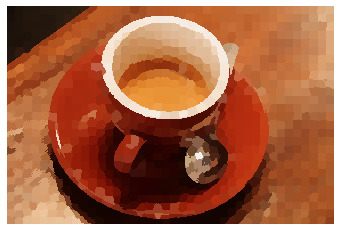

In [85]:
%matplotlib inline 
from skimage import data, segmentation, color 
from skimage.future import graph 
from matplotlib import pyplot as plt 
 
img = data.coffee() 
 
labels = segmentation.slic(img, compactness=30, n_segments=1000) 
out = color.label2rgb(labels, img, kind='avg')
plt.imshow(out) 
plt.axis('off') 
plt.show()

15.2 Tinting Greyscale Images

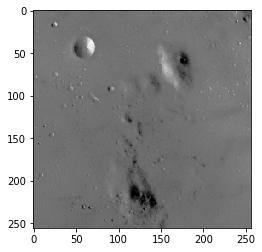

In [86]:
%matplotlib inline 
import matplotlib.pyplot as plt 
from skimage import data, color, img_as_float 
grayscale_image = img_as_float(data.moon()[::2, ::2]) 
image = color.gray2rgb(grayscale_image) 
plt.imshow(image) 
plt.show()

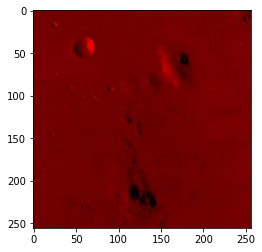

In [88]:
red_multiplier = [1, 0, 0] 
output1 = image * red_multiplier 
plt.imshow(output1)
plt.show()

In [89]:
green_multiplier = [0, 1, 0] 
blue_multiplier = [0, 0, 1] 
yellow_multiplier = [1, 1, 0] 
cyan_multiplier = [0, 1, 1]

15.3 Contours

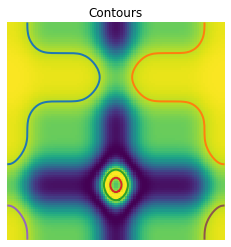

In [90]:
from skimage import measure 
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j] 
r = np.cos(np.exp((np.sin(x)**3 + np.cos(y)**5))) 
 
# Display the image and plot all contours found 
plt.imshow(r, interpolation='nearest') 
# Find contours at a constant value of 0.8 
contours = measure.find_contours(r, 0.8) 
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2) 
    plt.title('Contours') 
    plt.axis('off') 
plt.show()